In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


CC = "monax"

def plot_throughput_bandwidth(CC):
    base_dir = f'../record/local/latest'
    # base_dir = '../record/local/2022_01_12_20_46_00'
    file_list = os.listdir(base_dir)

    file_list.sort()

    flow = {}

    data = {}

    data["Time (s)"] = []
    data["Throughput (Mbps)"] = []
    data["Flow"] = []

    new_data = {}

    NAME_MAPPING = {
        "MONAX": "Monax",
        "VEGAS": "Vegas",
        "CUBIC": "Cubic",
        "PCC-ALLEGRO": "PCC Allegro",
        "PCC-VIVACE": "PCC Vivace",
        "BBR": "BBR"
    }

    flow_count = 0

    bandwidth_shift = 25
    throughput_shift = 0

    data_proportion = 0.2

    for file in file_list:
        if('csv' in file):
            CC = file.split('_')[2].upper()
            df = pd.read_csv(os.path.join(base_dir,file))
            flow_id = int(file.split('_')[1])
            time = df['time'].values
            delivery_rate = df['delivery_rate']
            sending_rate = df['server_sending_rate']
            bandwidth = df['bandwidth']
            # sending_rate_ewma = df["sending_rate_ewma"]
            print(f"{len(time)}")
            print(f"{len(bandwidth)}")

            if(flow_id == 0):

                time = time[0:int(data_proportion*len(time))]
                delivery_rate = delivery_rate[throughput_shift:int(data_proportion*len(delivery_rate))+throughput_shift]
                sending_rate = sending_rate[throughput_shift:int(data_proportion*len(sending_rate))+throughput_shift]
                bandwidth = bandwidth[bandwidth_shift:int(data_proportion*len(bandwidth))+bandwidth_shift]
                # sending_rate_ewma = sending_rate_ewma[throughput_shift:int(data_proportion*len(sending_rate_ewma))+throughput_shift]
                min_time = min(time)
                time = time - min_time
            else:
                time = time - min_time
            # time = np.append(time, time[-1]+1)
            # delivery_rate = np.append(delivery_rate, 0)

            new_data["Flow "+str(flow_id+1)] = {}
            new_data["Flow "+str(flow_id+1)]["time"] = list(time)
            new_data["Flow "+str(flow_id+1)]["throughput"] = list(delivery_rate)
            new_data["Flow "+str(flow_id+1)]["bandwidth"] = list(bandwidth)
            new_data["Flow "+str(flow_id+1)]["sending_rate"] = list(sending_rate)
            # new_data["Flow "+str(flow_id+1)]["sending_rate_ewma"] = list(sending_rate_ewma)    
            # flow[flow_id] = delivery_rate
            
            
            COLORS = ['orange', 'orchid', 'purple', 'blue', 'darksalmon']
            MARKER_SIZE = 11
            LINE_WIDTH = 3.5


            fig, axes = plt.subplots(1, 1, figsize=(30, 10))

            x = list(range(1,17))


            # 折线图
            axes.plot(new_data["Flow 1"]["time"], new_data["Flow 1"]["throughput"], color='orange', label="Throughput",  linewidth=LINE_WIDTH)
            axes.plot(new_data["Flow 1"]["time"], new_data["Flow 1"]["bandwidth"], color='blue', label="Bandwidth", linewidth=LINE_WIDTH, linestyle='-')
            # 
            plt.legend(loc=1, fontsize=30, bbox_to_anchor = (1,1), title_fontsize=25, columnspacing=1.2, handletextpad=0.5)

            axes.grid(which='minor', c='lightgrey')

            #设置坐标标签标注和字体大小
            plt.xlabel("Time (s)",fontsize=30)
            plt.ylabel("Throughput (Mbps)",fontsize=30)

            #设置坐标刻度字体大小
            plt.xticks(fontsize=30)
            plt.yticks(fontsize=30)

            plt.title(f"{CC}")
            plt.savefig(f"./{CC}_bandwidth.png",bbox_inches = 'tight')
            plt.show()
        

514
514


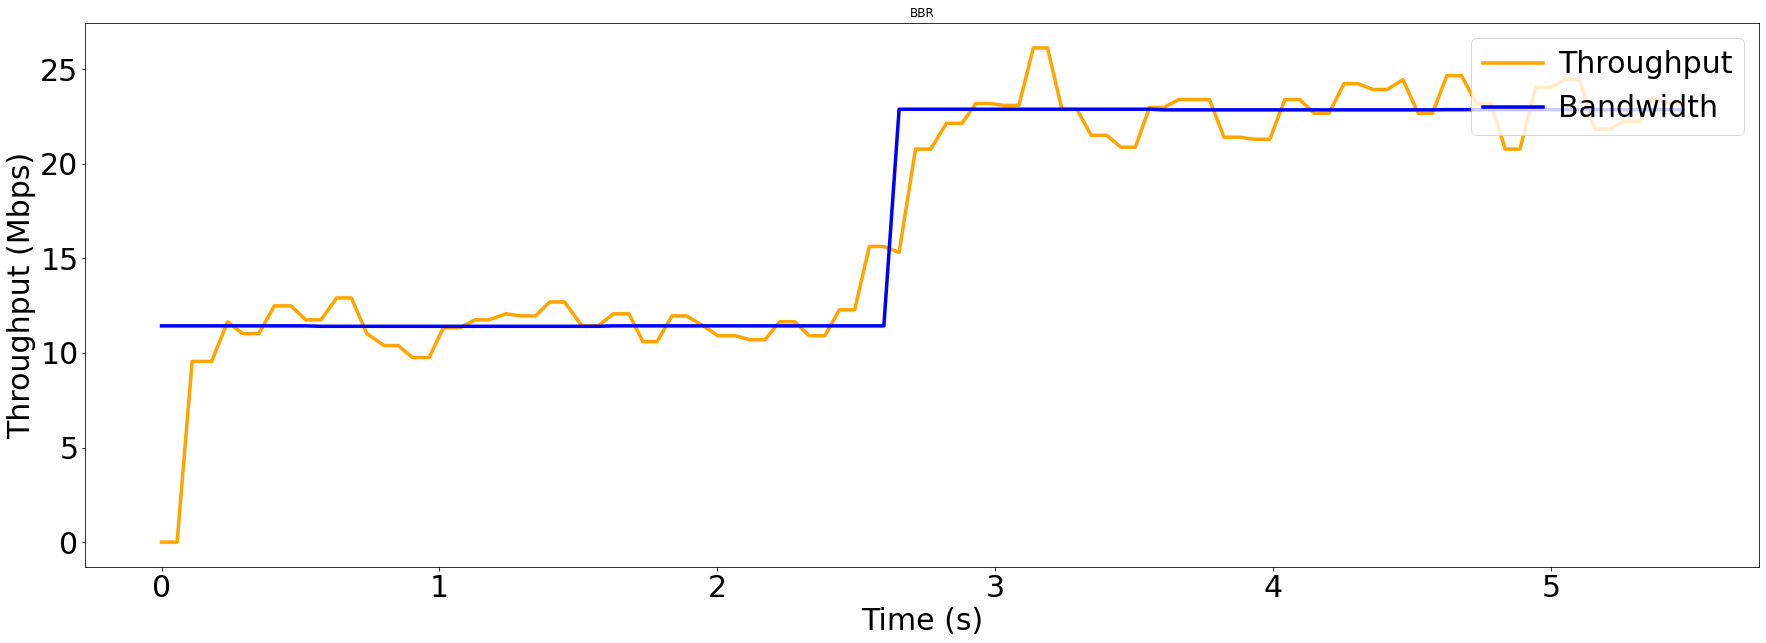

818
818


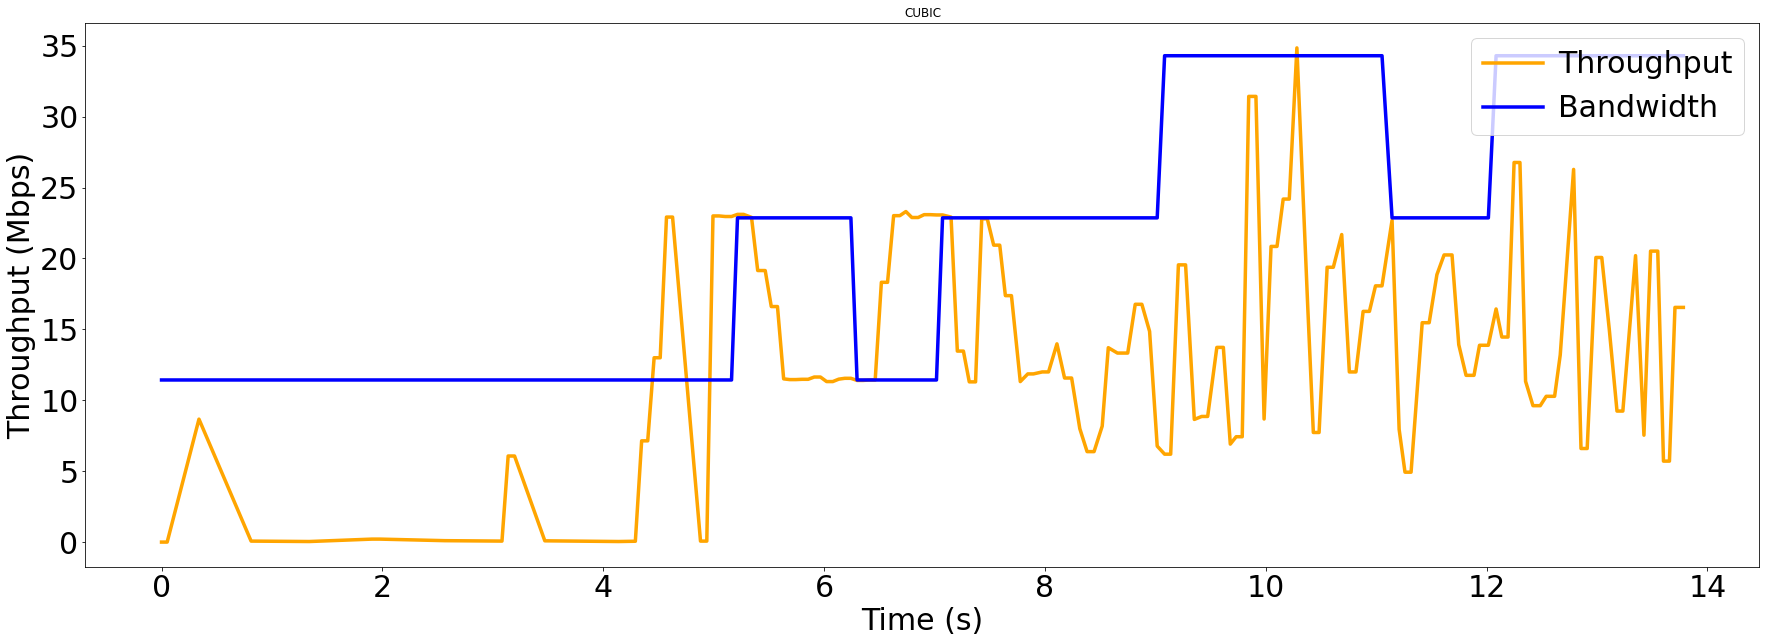

815
815


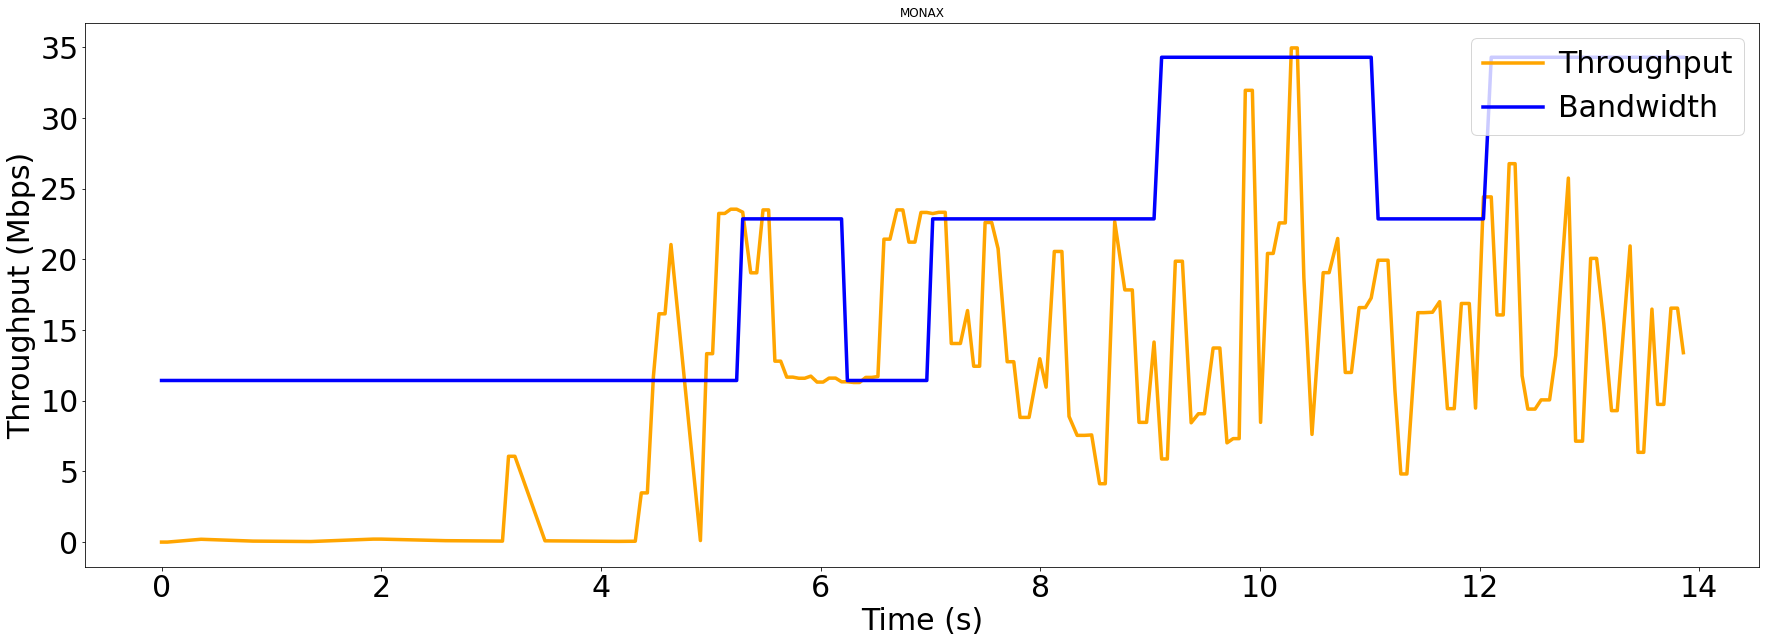

519
519


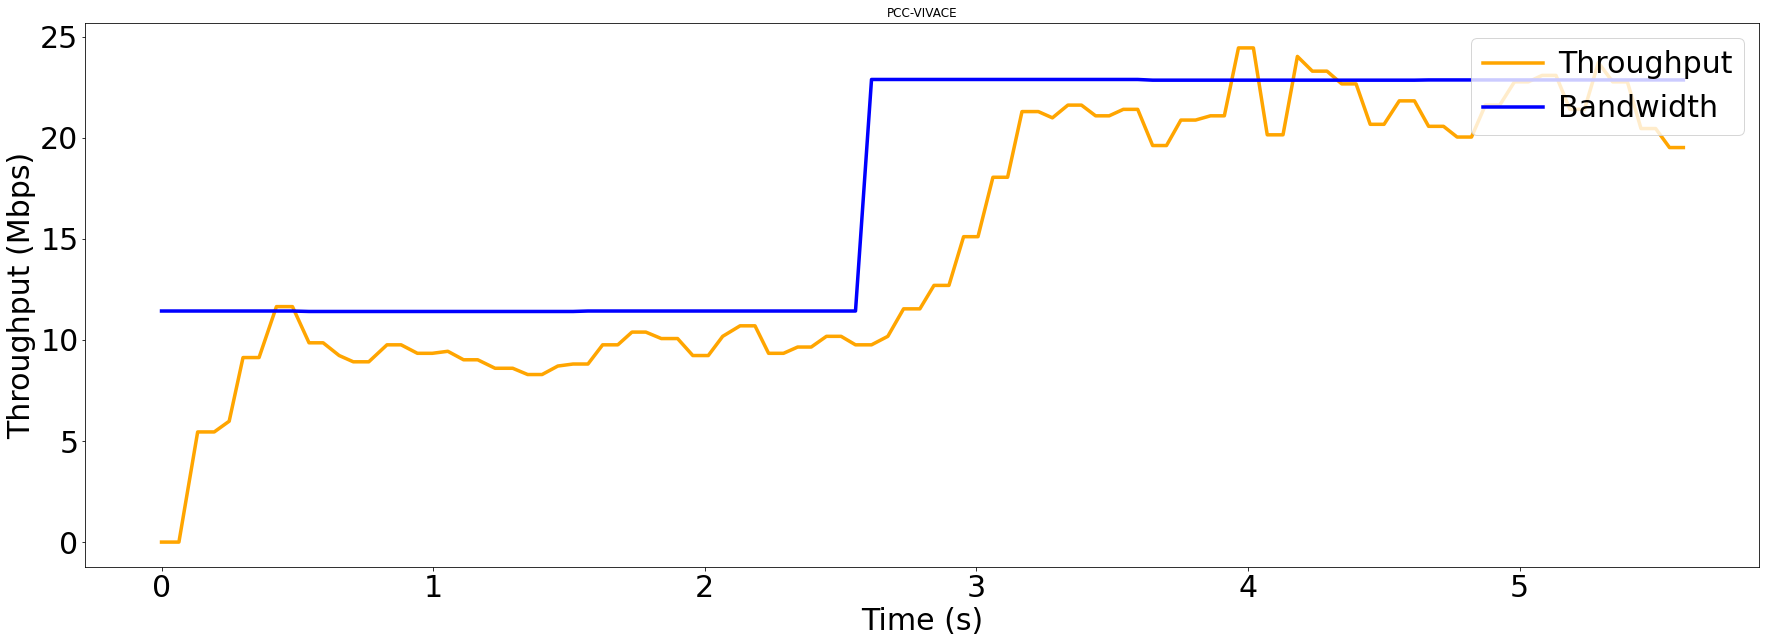

520
520


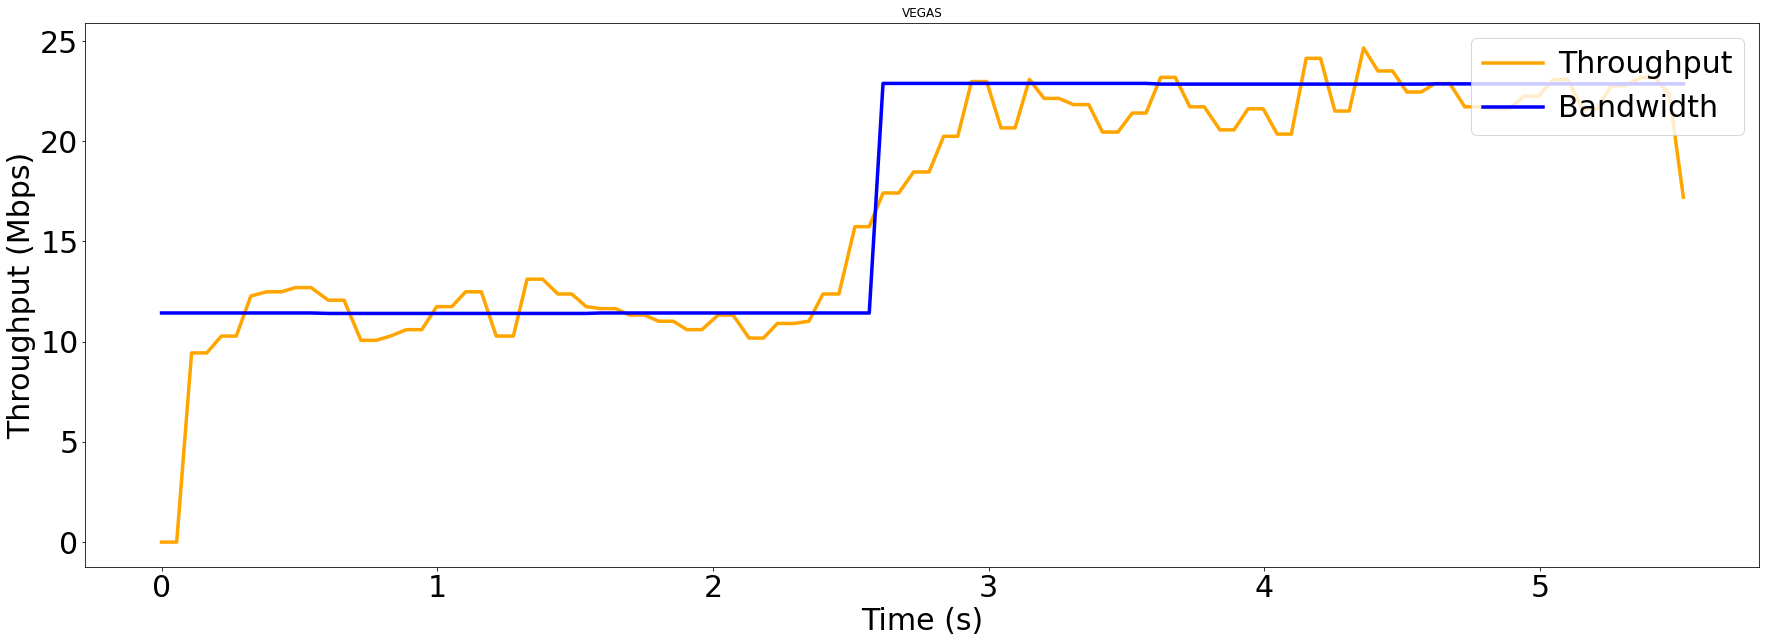

514
514


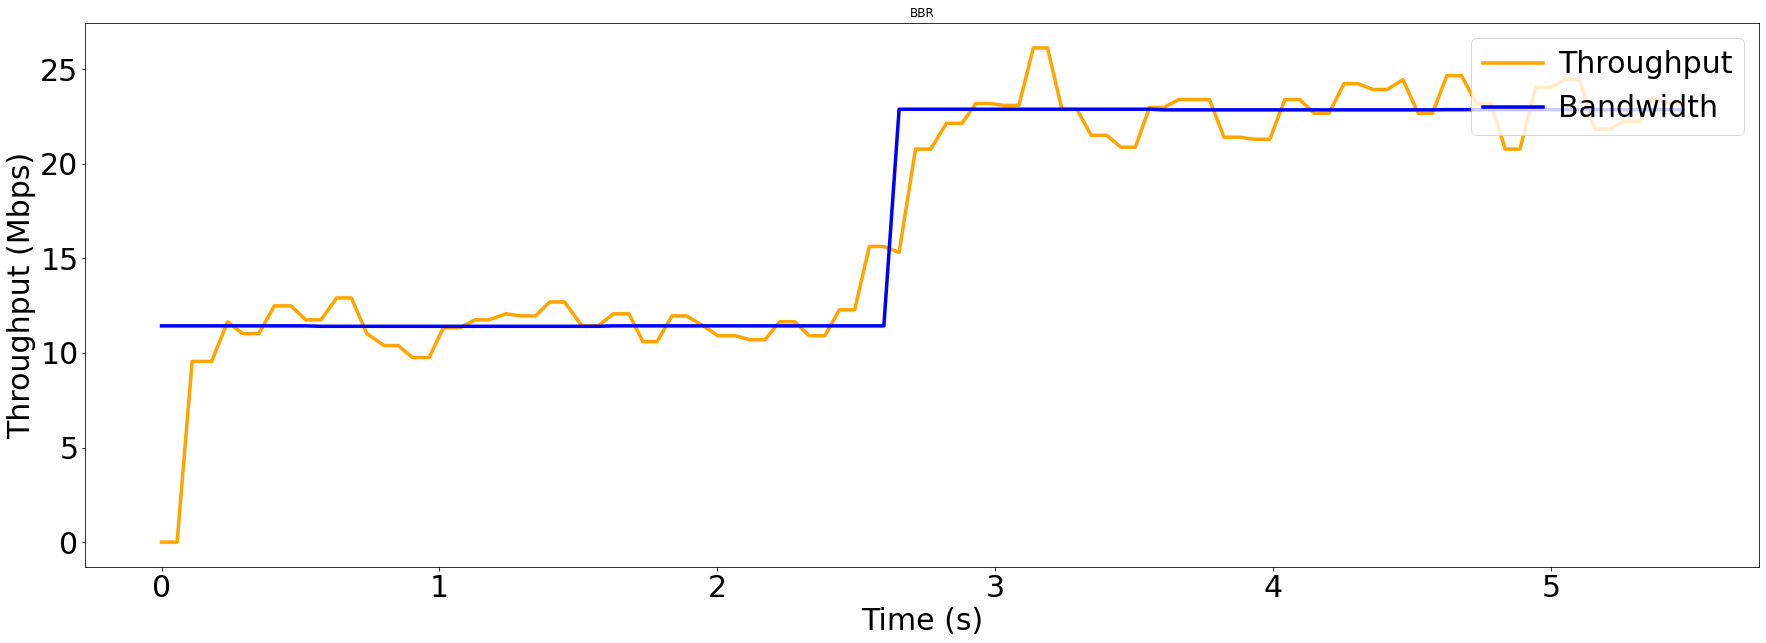

818
818


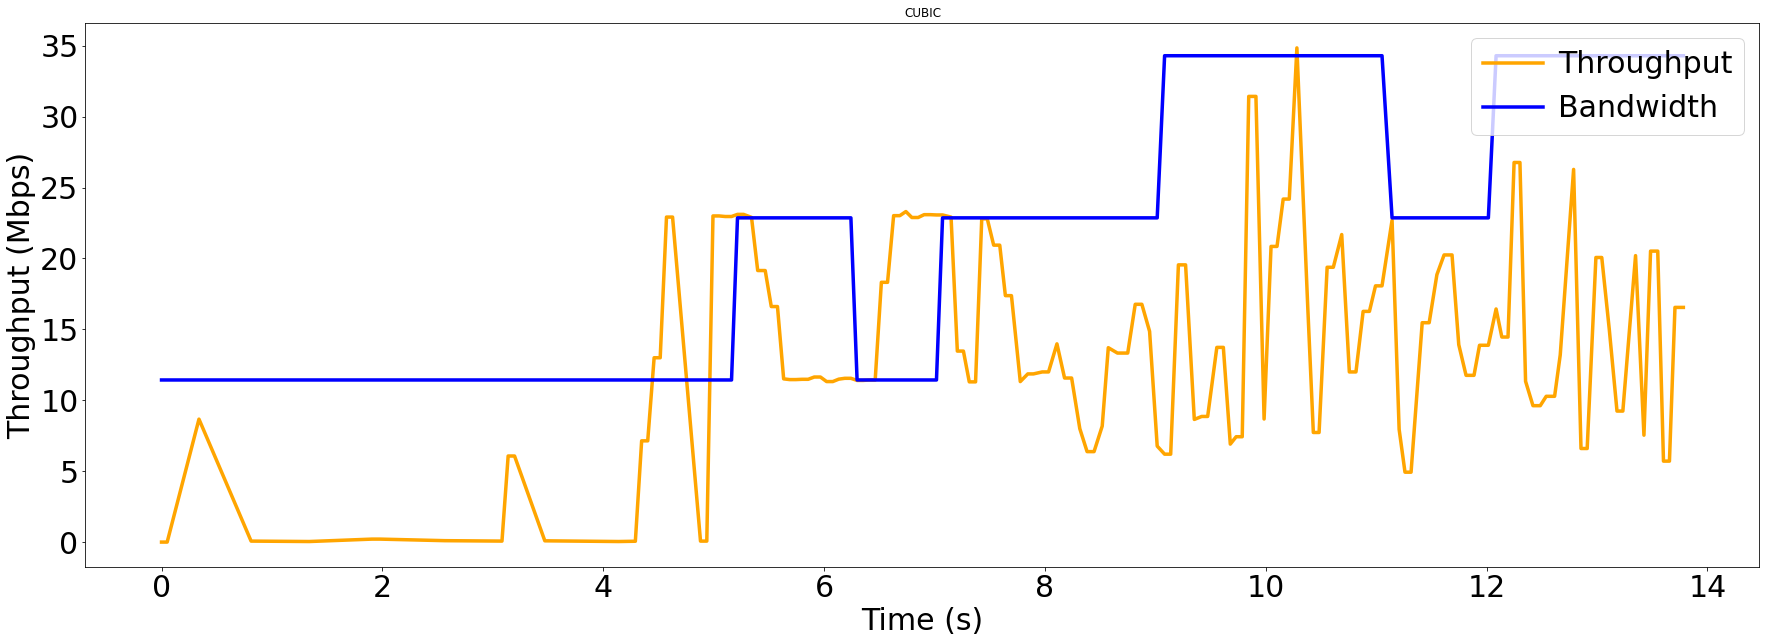

815
815


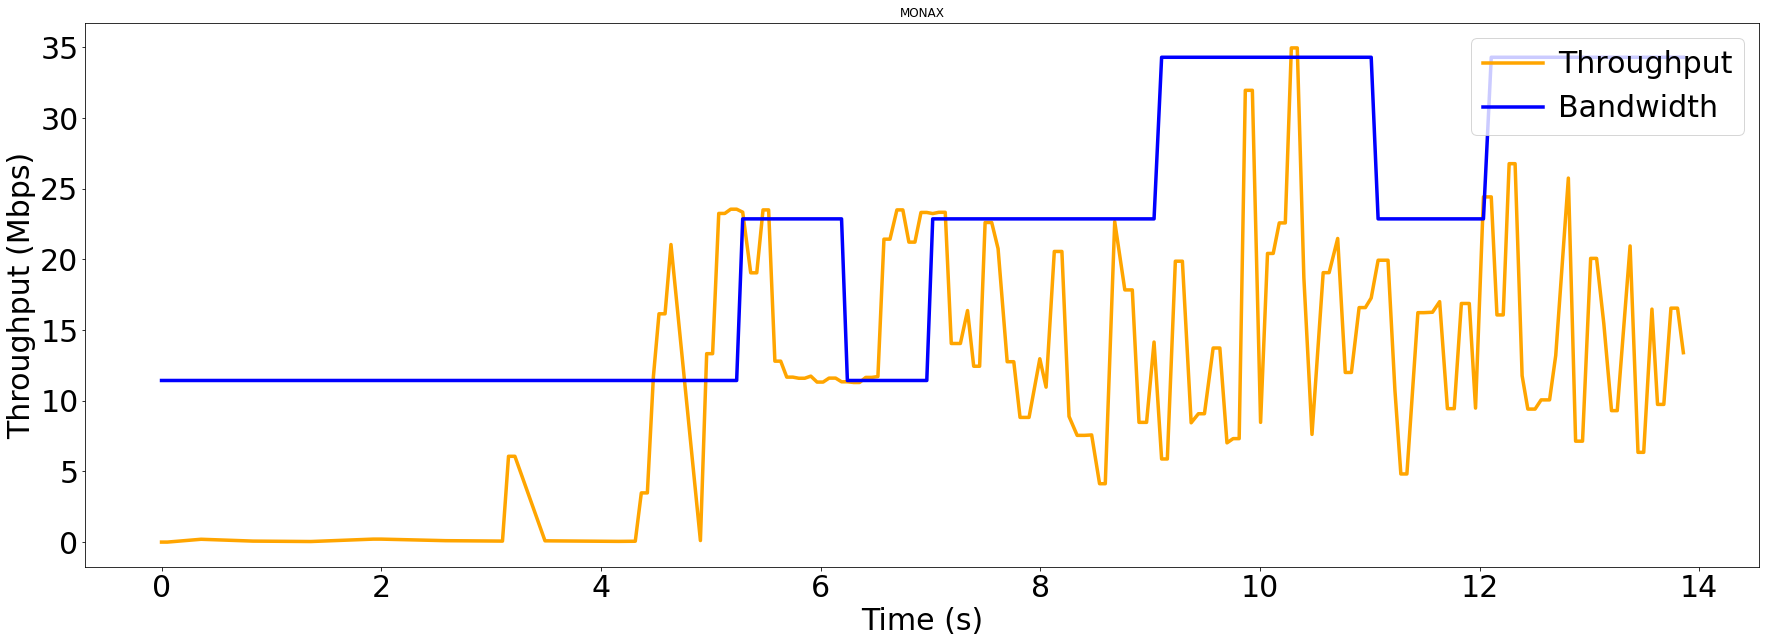

519
519


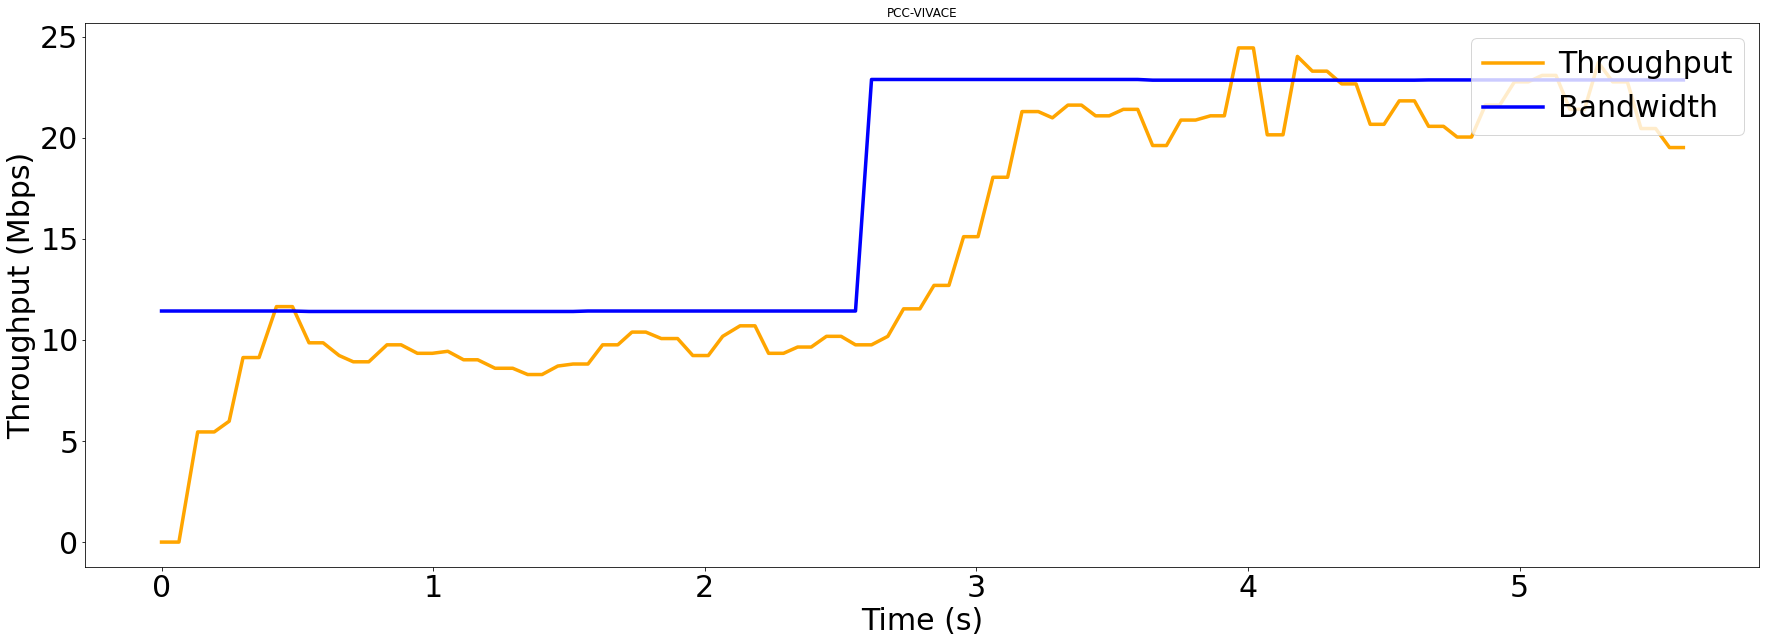

520
520


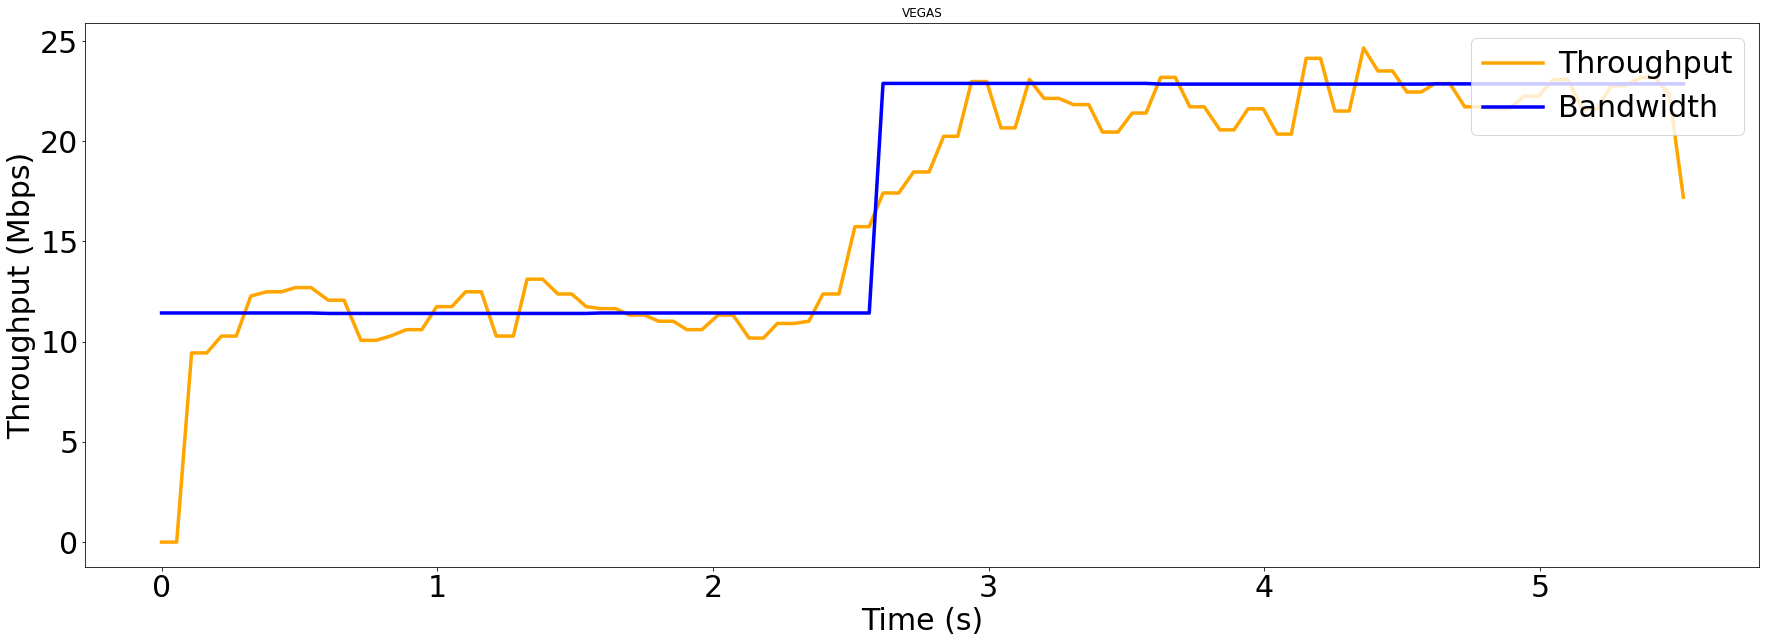

In [5]:
plot_throughput_bandwidth("CUBIC")
plot_throughput_bandwidth("MONAX")
# plot_throughput_bandwidth("pcc-vivace")
# plot_throughput_bandwidth("monax")

In [67]:
import time 
time.time()

1641805107.6177197